In [4]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#reading data
data = pd.read_csv("netflix_titles.csv")
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#understanding about data

print(data.shape)
print(data.isnull().sum())

(8807, 12)
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#cleaning the dataset
#removed data that contains null value
data = data.dropna(subset = ("director","cast","country","date_added","rating","duration"))
data.isnull().sum()

(5332, 12)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

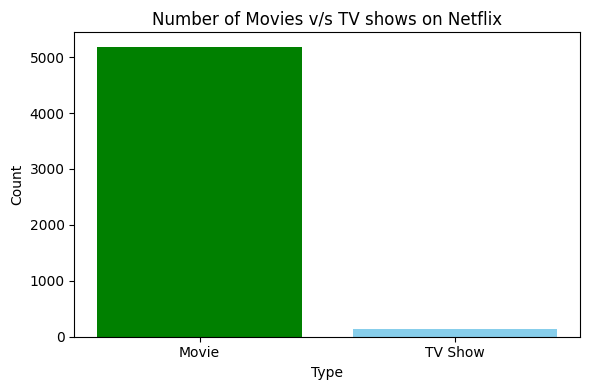

[5185  147]


In [ ]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color = ["green","skyblue"])
plt.title("Number of Movies v/s TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

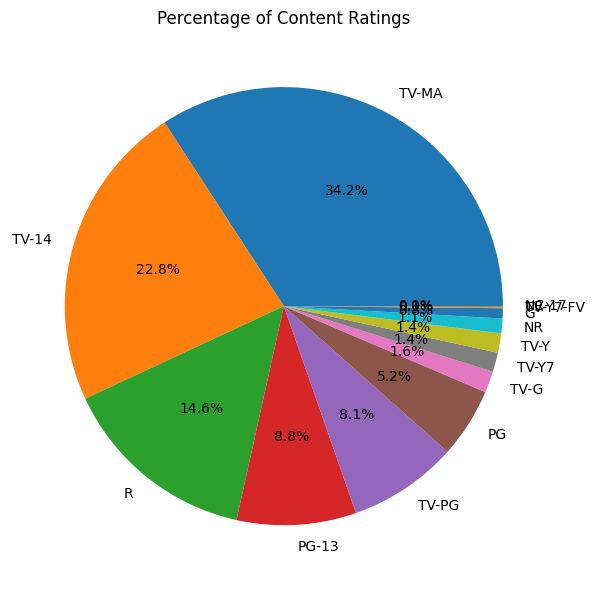

In [16]:
ratings_count = data["rating"].value_counts()
plt.figure(figsize = (8,6))
plt.pie(ratings_count, labels = ratings_count.index, autopct = "%1.1f%%")
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.show()


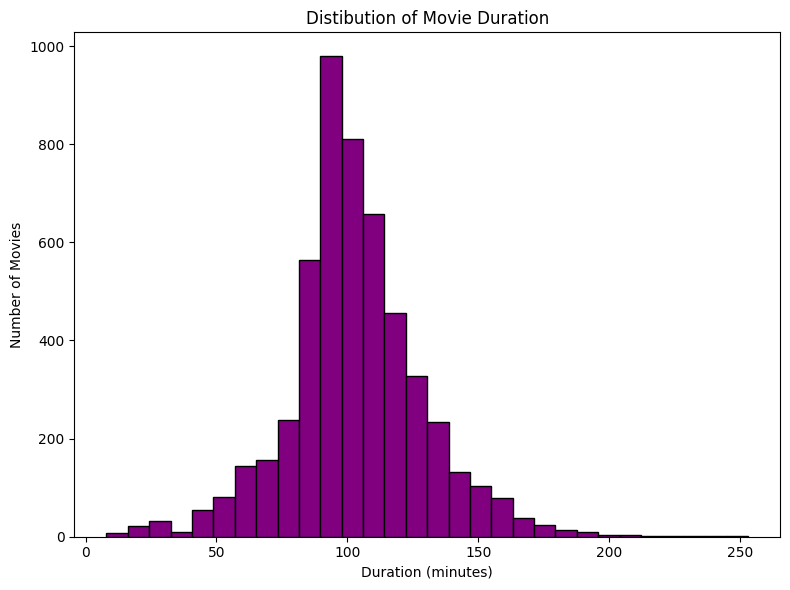

In [20]:
movie_data = data[data['type'] == "Movie"].copy()
movie_data['duration_int'] = movie_data['duration'].str.replace(' min',"").astype(int)

plt.figure(figsize = (8,6))
plt.hist(movie_data['duration_int'], bins = 30, color = 'purple', edgecolor = 'black')
plt.title("Distibution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


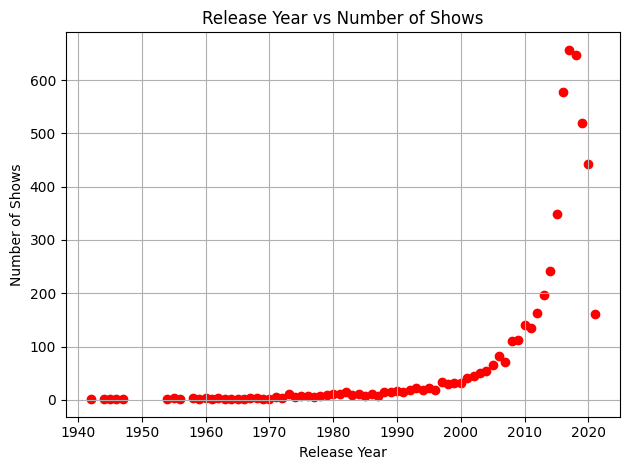

In [27]:
release_counts = data['release_year'].value_counts().sort_index()
plt.scatter(release_counts.index, release_counts.values, color = "red")
plt.title("Release Year vs Number of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.tight_layout()
plt.show()

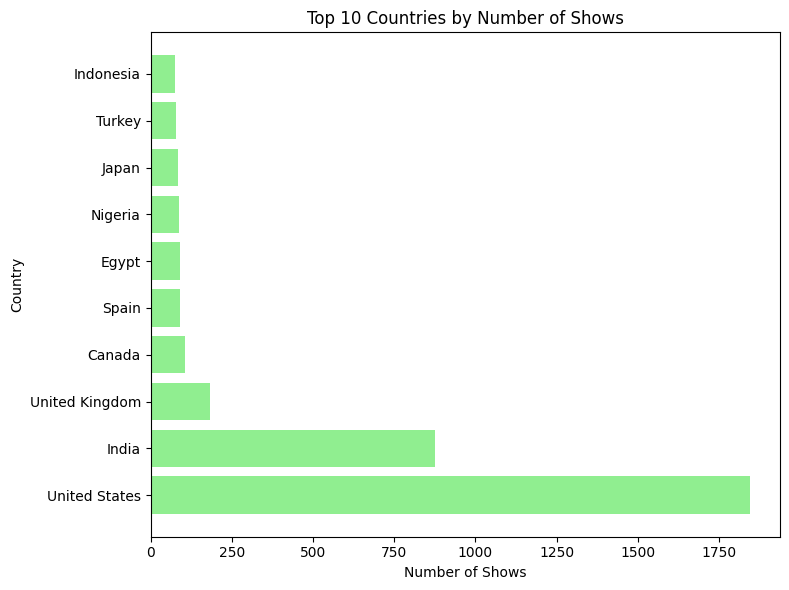

In [23]:
country_counts = data['country'].value_counts().head(10)
plt.figure(figsize= (8,6))
plt.barh(country_counts.index, country_counts.values, color = "lightgreen")
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

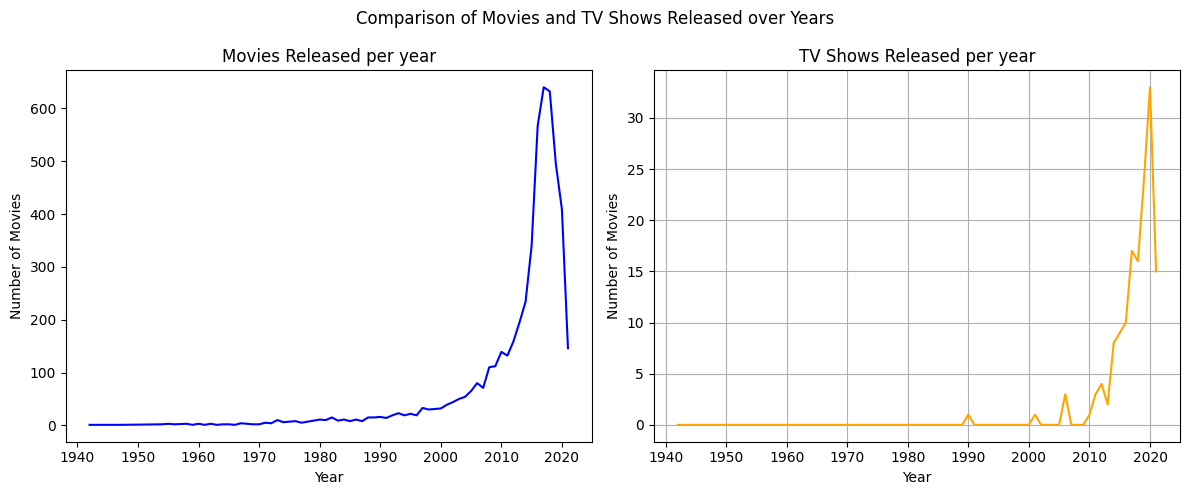

In [ ]:
content_by_year = data.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize = (12,5))

#first subplot
ax[0].plot(content_by_year.index, content_by_year["Movie"], color = "blue")
ax[0].set_title("Movies Released per year")
ax[0].set_xlabel('Year')
ax[0].set_ylabel("Number of Movies")


#second subplot
ax[1].plot(content_by_year.index, content_by_year["TV Show"], color = "orange")
ax[1].set_title("TV Shows Released per year")
ax[1].set_xlabel('Year')
ax[1].set_ylabel("Number of Movies")

plt.suptitle("Comparison of Movies and TV Shows Released over Years")
plt.tight_layout()
plt.show()